In [1]:
import networkx as nx
%matplotlib inline
number_of_nodes = 10
G = nx.complete_graph(number_of_nodes)

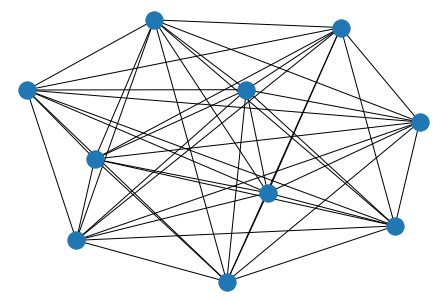

In [2]:
nx.draw(G)

In [3]:
list(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
import random
from nxsim import BaseNetworkAgent

class ZombieOutbreak(BaseNetworkAgent):
    def __init__(self, environment=None, agent_id=0, state=()):
        super().__init__(environment=environment, agent_id=agent_id, state=state)
        self.bite_prob = 0.05

    def run(self):
        while True:
            if self.state['id'] == 1:
                self.zombify()
                yield self.env.timeout(1)
            else:
                yield self.env.event()

    def zombify(self):
        normal_neighbors = self.get_neighboring_agents(state_id=0)
        for neighbor in normal_neighbors:
            if random.random() < self.bite_prob:
                neighbor.state['id'] = 1  # zombie
                print(self.env.now, self.id, neighbor.id, sep='\t')
                break

In [5]:
from nxsim import NetworkSimulation

# Initialize agent states. Let's assume everyone is normal.
# Add keys as as necessary, but "id" must always refer to that state category
init_states = [{'id': 0, } for _ in range(number_of_nodes)]

# Seed a zombie
init_states[5] = {'id': 1}
sim = NetworkSimulation(topology=G, states=init_states, agent_type=ZombieOutbreak,
                        max_time=30, dir_path='sim_01', num_trials=1, logging_interval=1.0)

In [6]:
sim.run_simulation()

Starting simulations...
---Trial 0---
Setting up agents...
2	5	7
5	5	1
6	5	9
7	5	8
11	5	2
12	5	4
28	5	0
Written 30 items to pickled binary file: sim_01\log.0.state.pickled
Simulation completed.


In [7]:
trial = BaseLoggingAgent.open_trial_state_history(dir_path='sim_01', trial_id=0)

NameError: name 'BaseLoggingAgent' is not defined

In [8]:
from matplotlib import pyplot as plt
zombie_census = [sum([1 for node_id, state in g.items() if state['id'] == 1]) for t,g in trial.items()]
plt.plot(zombie_census)

NameError: name 'trial' is not defined